In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/train.zip

Archive:  /content/drive/MyDrive/train.zip
   creating: train/
   creating: train/with_mask/
  inflating: train/with_mask/-110603108-gettyimages-533567012.jpg  
  inflating: train/with_mask/-110695084-mask2.jpg  
  inflating: train/with_mask/0-with-mask.jpg  
  inflating: train/with_mask/0000305-62360-halyard-health-pfr-p3-respirator-face-mask-ffp.jpeg  
  inflating: train/with_mask/0000444-48296-halyard-health-surgical-mask-teddy-bear-print.jpeg  
  inflating: train/with_mask/007563.jpg  
  inflating: train/with_mask/0779db20580fc7b054ad6b1b7bd9fb35.jpeg  
  inflating: train/with_mask/1-respirator-mask.jpg  
  inflating: train/with_mask/10-with-mask.jpg  
  inflating: train/with_mask/100-with-mask.jpg  
  inflating: train/with_mask/101-with-mask.jpg  
  inflating: train/with_mask/103-with-mask.jpg  
  inflating: train/with_mask/104-with-mask.jpg  
  inflating: train/with_mask/105-with-mask.jpg  
  inflating: train/with_mask/106.jpg  
  inflating: train/with_mask/107-with-mask.jpg  
  

In [ ]:
!unzip /content/drive/MyDrive/test.zip

Archive:  /content/drive/MyDrive/test.zip
   creating: test/
   creating: test/with_mask/
  inflating: test/with_mask/1-with-mask.jpg  
  inflating: test/with_mask/106-with-mask.jpg  
  inflating: test/with_mask/11-with-mask.jpg  
  inflating: test/with_mask/110-with-mask.jpg  
  inflating: test/with_mask/111-with-mask.jpg  
  inflating: test/with_mask/114-with-mask.jpg  
  inflating: test/with_mask/121-with-mask.jpg  
  inflating: test/with_mask/127-with-mask.jpg  
  inflating: test/with_mask/141-with-mask.jpg  
  inflating: test/with_mask/146-with-mask.jpg  
  inflating: test/with_mask/157-with-mask.jpg  
  inflating: test/with_mask/160-with-mask.jpg  
  inflating: test/with_mask/165-with-mask.jpg  
  inflating: test/with_mask/167-with-mask.jpg  
  inflating: test/with_mask/174-with-mask.jpg  
  inflating: test/with_mask/181-with-mask.jpg  
  inflating: test/with_mask/184-with-mask.jpg  
  inflating: test/with_mask/186-with-mask.jpg  
  inflating: test/with_mask/193-with-mask.jpg  
 

In [ ]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [ ]:
model =Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
TRAINING_DIR = "/content/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    target_size=(150, 150))

Found 1315 images belonging to 2 classes.


In [ ]:
VALIDATION_DIR = "/content/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=10,
                                                         target_size=(150, 150))
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 194 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/10


<ipython-input-14-6272b23e5a0b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


132/132 [==============================] - 21s 108ms/step - loss: 0.5455 - acc: 0.7452 - val_loss: 0.2089 - val_acc: 0.9433
Epoch 2/10
132/132 [==============================] - 13s 101ms/step - loss: 0.3713 - acc: 0.8525 - val_loss: 0.1397 - val_acc: 0.9794
Epoch 3/10
132/132 [==============================] - 13s 101ms/step - loss: 0.2654 - acc: 0.9027 - val_loss: 0.1060 - val_acc: 0.9691
Epoch 4/10
132/132 [==============================] - 13s 95ms/step - loss: 0.2720 - acc: 0.8951 - val_loss: 0.1293 - val_acc: 0.9485
Epoch 5/10
132/132 [==============================] - 13s 99ms/step - loss: 0.2197 - acc: 0.9141 - val_loss: 0.0681 - val_acc: 0.9691
Epoch 6/10
132/132 [==============================] - 13s 96ms/step - loss: 0.3010 - acc: 0.8806 - val_loss: 0.1239 - val_acc: 0.9227
Epoch 7/10
132/132 [==============================] - 13s 97ms/step - loss: 0.2027 - acc: 0.9171 - val_loss: 0.0824 - val_acc: 0.9742
Epoch 8/10
132/132 [==============================] - 13s 100ms/step -

In [ ]:
import matplotlib.pyplot as plt

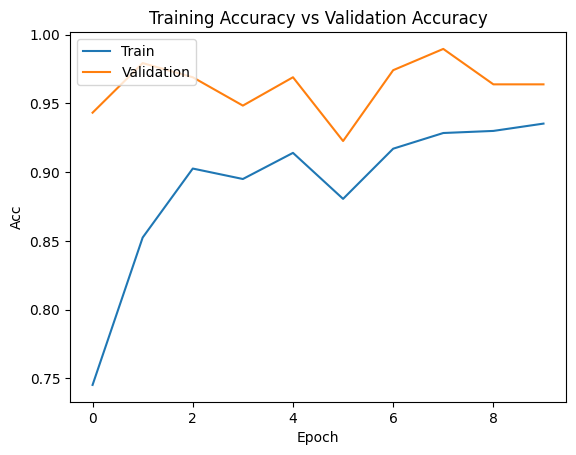

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

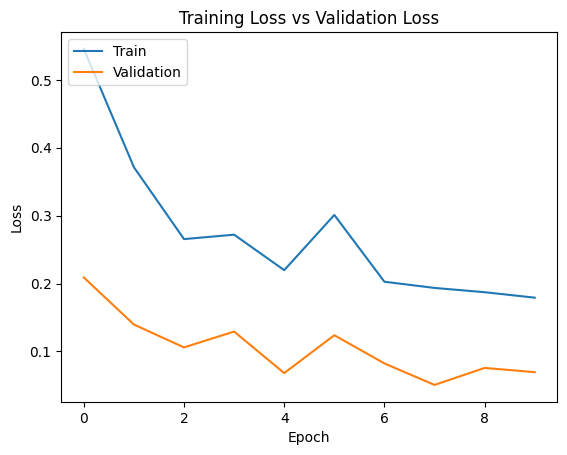

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
model=load_model("/content/model2-008.model")
results={0:'without mask',1:'mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}
rect_size = 4
cap = cv2.VideoCapture(0)
haarcascade = cv2.CascadeClassifier('/home/user_name/.local/lib/python3.6/site-packages/cv2/data/haarcascade_frontface_default.xml')
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1)

    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f]

        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]

        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)

